# Mount to google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls -la

total 4
-rw------- 1 root root 3312 Sep  3 04:47 original_paper_implementation.ipynb


In [7]:
%cd "/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/01_week1"
!pwd; ls -la

/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/01_week1
/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/01_week1
total 4
-rw------- 1 root root 3312 Sep  3 04:47 original_paper_implementation.ipynb


# Import necessary libraries

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_swiss_roll

In [20]:
n_samples = 5000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2, 0]] / 10 # scale data
data = data * np.array([1, -1])

(5000, 2)


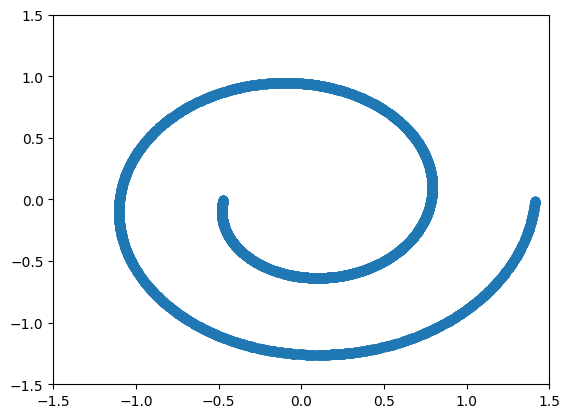

In [29]:
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
print(data.shape)
plt.scatter(data[:, 0], data[:, 1])

# Forward process
The forward trajectory, corresponding to starting at the data distribution and performing $T$ steps of diffusion, is thus
\begin{equation}
q\left(\mathbf{x}^{(0 \cdots T)}\right)=q\left(\mathbf{x}^{(0)}\right) \prod_{t=1}^T q\left(\mathbf{x}^{(t)} \mid \mathbf{x}^{(t-1)}\right)
\end{equation}

Using a guassian kernel, we can express as follow:

\begin{equation}
q\left(\mathbf{x}^{(t)} \mid \mathbf{x}^{(t-1)}\right)= N \left(\mathbf{x}^{(t)} ; \mathbf{x}^{(t-1)} \sqrt{1-\beta_t}, \mathbf{I} \beta_t\right)
\end{equation}

where $N$ is a gaussian distribution with mean μ and covariance Σ.

In [23]:
def forward_process(data, T, betas):

  for i in range(0, T):
    # diffusion rate
    beta_t = betas[i]
    mu = data * torch.sqrt(1 - beta_t)
    std = torch.sqrt(beta_t) # covariance to a std
    # sample from q(x_t | x_{t-1})
    data = mu + torch.randn_like(data) * std # data ~ N(mu, std)
  return data

In [30]:
T = 40
betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
xT = forward_process(torch.from_numpy(data), T, betas)
print(xT.shape)

torch.Size([5000, 2])


In [26]:
print(xT.mean(0))
print(xT.std(0))


tensor([ 0.0098, -0.0324], dtype=torch.float64)
tensor([0.9887, 0.9928], dtype=torch.float64)


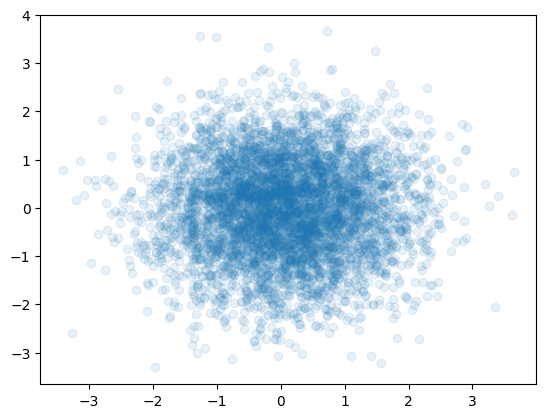

In [32]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha = 0.1)